# Analysis of Expert Commentaries from qualitymeasures.ahrq.gov

In [1]:
with open("../scripts/archive-status-qualitymeasuresahrqgov-expert-commentaries.uniq.mdt.tsv") as f:
    data = f.read()

In [2]:
identifiers = []
mementocounts = []
timemaps = []
totalcount = 0
notarchived = []
alldata = {}

for line in data.splitlines():
    line = line.strip()
    row = line.split('\t')
    
    if row[1] == 'ARCHIVED':
        s2 = row[0].replace('https://qualitymeasures.ahrq.gov/expert/expert-commentary/', '')
        identifier = int(s2[:s2.find('/')])
#         mementocount = int(row[2].replace("mementos", "").strip())
        timemap = eval(row[3])
        mementocount = len(timemap)
        
        identifiers.append( identifier )
        mementocounts.append( mementocount )
        
        timemaps.append( timemap )
        
        alldata[identifier] = timemap
        
    elif row[1] == 'NOT ARCHIVED':
        notarchived.append(row[0])
        
    totalcount += 1

In [3]:
len(identifiers)

52

In [4]:
len(mementocounts)

52

In [5]:
len(timemaps)

52

In [6]:
totalcount

52

In [7]:
len(notarchived)

0

In [8]:
len(notarchived) / totalcount

0.0

In [9]:
len(timemaps) / totalcount

1.0

In [10]:
import matplotlib.pyplot as plt

In [11]:
max(mementocounts)

7

In [12]:
min(mementocounts)

6

In [13]:
min(identifiers)

16453

In [14]:
max(identifiers)

50333

counts: [ 4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 48.]
bars: [6.   6.04 6.08 6.12 6.16 6.2  6.24 6.28 6.32 6.36 6.4  6.44 6.48 6.52
 6.56 6.6  6.64 6.68 6.72 6.76 6.8  6.84 6.88 6.92 6.96 7.  ]
bins: <a list of 25 Patch objects>
max counts: 48.0
index of max counts: 24
bars[ind]: 6.96


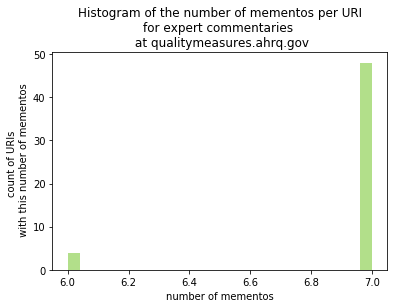

In [15]:
counts, bars, bins = plt.hist(mementocounts, bins=25, color="#b2df8a")
plt.xlabel("number of mementos")
plt.ylabel("count of URIs \n with this number of mementos")
plt.title("Histogram of the number of mementos per URI\nfor expert commentaries \n at qualitymeasures.ahrq.gov")
print("counts: {}".format(counts))
print("bars: {}".format(bars))
print("bins: {}".format(bins))
print("max counts: {}".format(max(counts)))
ind = counts.tolist().index(max(counts))
print("index of max counts: {}".format(ind))
print("bars[ind]: {}".format(bars[ind]))

Text(0,0.5,'document identifier')

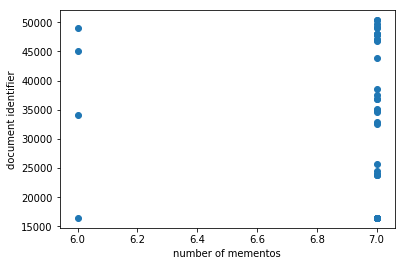

In [16]:
plt.scatter(mementocounts, identifiers)
plt.xlabel("number of mementos")
plt.ylabel("document identifier")

In [17]:
all_mdts = []

for timemap in timemaps:
    for memento in timemap:
        all_mdts.append(memento['datetime'])

In [18]:
len(all_mdts)

360

In [19]:
min(all_mdts)

'2016-12-20T09:11:27Z'

In [20]:
max(all_mdts)

'2018-06-20T17:40:15Z'

In [21]:
from datetime import datetime

ids2mementos = []
mdt2ids = []
monthbuckets = {}

for identifier in alldata:
    timemap = alldata[identifier]
    
    for memento in timemap:
        
        ids2mementos.append(identifier)
        
        mdt = datetime.strptime(memento['datetime'], '%Y-%m-%dT%H:%M:%SZ')
        
        mdt2ids.append(mdt)
        monthbuckets.setdefault( datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m'), 0)
        monthbuckets[ datetime.strptime(mdt.strftime('%Y-%m'), '%Y-%m') ] += 1

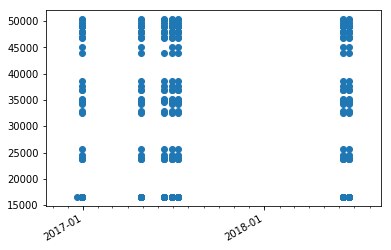

In [22]:
import matplotlib.dates as mdates

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()

ax.scatter(mdt2ids, ids2mementos)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate()

In [23]:
print("hi")

hi


In [24]:
x = []
y = []

for key in monthbuckets:
    x.append(key)
    y.append(monthbuckets[key])

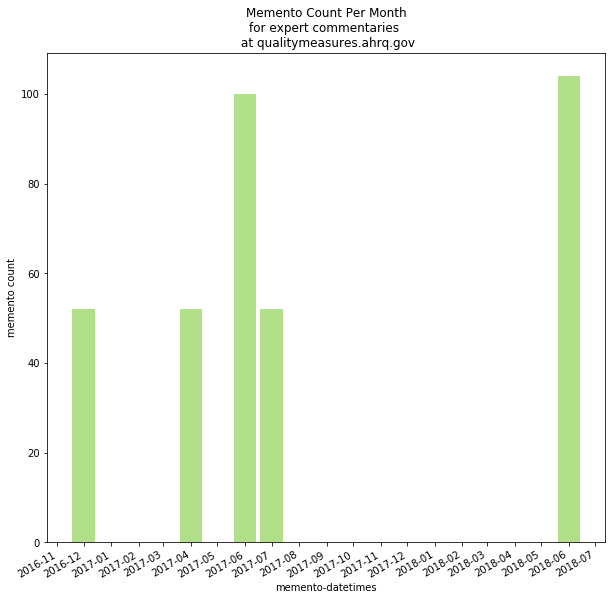

In [25]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.bar(x, y, width=25, color="#b2df8a")

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

ax.set_xlabel("memento-datetimes")
ax.set_ylabel("memento count")
ax.set_title("Memento Count Per Month\nfor expert commentaries \n at qualitymeasures.ahrq.gov")

fig.autofmt_xdate()

In [26]:
list(monthbuckets.keys())[0]

datetime.datetime(2016, 12, 1, 0, 0)

In [27]:
monthbuckets[list(monthbuckets.keys())[0]]

52

In [28]:
from urllib.parse import urlparse

archivedomains = {}

for timemap in timemaps:
    
    for memento in timemap:
        urim = memento['uri']
        archivedomain = urlparse(urim).netloc.split(':')[0]
        archivedomains.setdefault(archivedomain, 0)
        archivedomains[archivedomain] += 1

In [29]:
archivedomains

{'web.archive.org': 360}

In [30]:
total_mementos = 0

for ad in archivedomains:
    count = archivedomains[ad]
    total_mementos += count
    
total_mementos

360

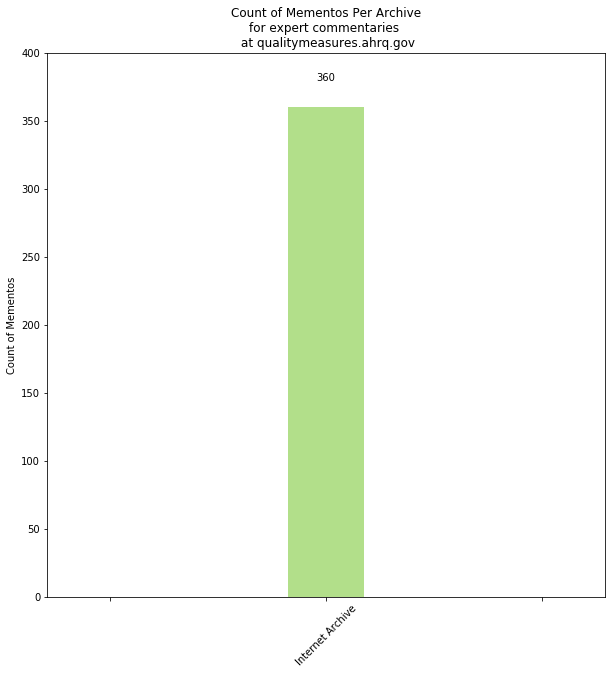

In [31]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 3
archivecounts = (0, 360, 0)
# men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
rects1 = ax.bar(ind, archivecounts, width, align='center', color="#b2df8a")

# women_means = (25, 32, 34, 20, 25)
# women_std = (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Count of Mementos')
ax.set_title('Count of Mementos Per Archive\nfor expert commentaries \n at qualitymeasures.ahrq.gov')
ax.set_xticks(ind)
ax.set_xticklabels(('', 'Internet Archive', ''))
ax.set_ylim(0, 400)

# ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        
        if height != 0:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

autolabel(rects1)
# autolabel(rects2)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.show()